# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [8]:
# Check for missing values
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:\n")
print(df.describe())


Missing Values in Each Column:

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

Summary Statistics:

           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.63000

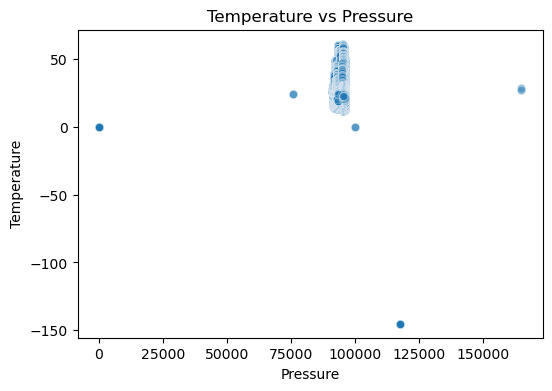

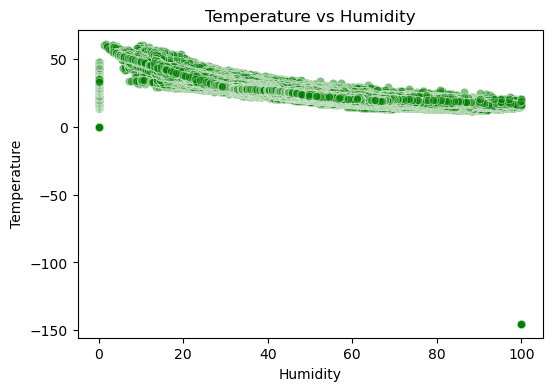

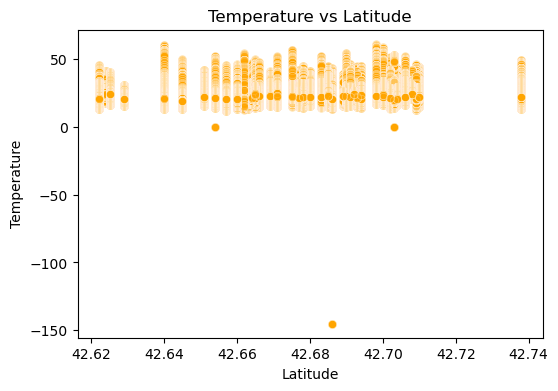

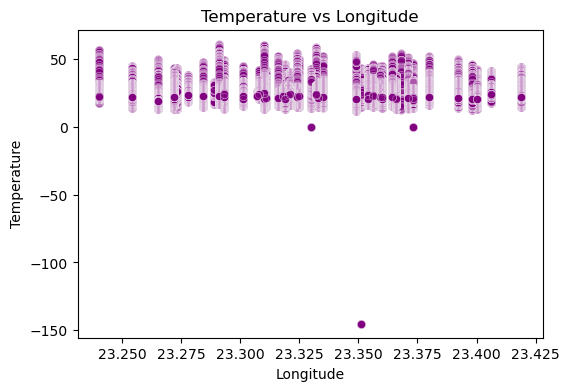

In [10]:
# Scatter plot to observe relationship
#Scatter plot: Temperature vs Pressure
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pressure', y='temperature', data=df, alpha=0.5)
plt.title('Temperature vs Pressure')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

#Scatter plot: Temperature vs Humidity
plt.figure(figsize=(6, 4))
sns.scatterplot(x='humidity', y='temperature', data=df, alpha=0.5, color='green')
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

#Scatter plot: Temperature vs Latitude
plt.figure(figsize=(6, 4))
sns.scatterplot(x='lat', y='temperature', data=df, alpha=0.5, color='orange')
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

#Scatter plot: Temperature vs Longitude
plt.figure(figsize=(6, 4))
sns.scatterplot(x='lon', y='temperature', data=df, alpha=0.5, color='purple')
plt.title('Temperature vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.show()


## Data Preprocessing

In [12]:
# Drop any rows with missing values
df_cleaned = df.dropna()

# Define features and target
X = df_cleaned[['pressure', 'humidity', 'lat', 'lon']]  # Features
y = df_cleaned['temperature']                           # Target variable

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (561238, 4)
Testing Set Shape: (140310, 4)


## Model Training

In [28]:
# Using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

print("Intercept:", lr_model.intercept_)
print("Temperature change with respect to each Coefficients are:", dict(zip(X.columns, lr_model.coef_)))

Intercept: -2911.7812519749323
Temperature change with respect to each Coefficients are: {'pressure': -0.0027708107104396397, 'humidity': -0.2986056361133211, 'lat': 63.64434025555022, 'lon': 21.333173497607312}


In [40]:
# Create a DataFrame to compare actual vs predicted temperature

comparison_df = pd.DataFrame({
    '  Actual Temperature': y_test.values[:10],
    '     Predicted Temperature': y_pred[:10]})

print("\nComparison of Actual vs Predicted Temperatures (first 10 samples):")
print(comparison_df)


Comparison of Actual vs Predicted Temperatures (first 10 samples):
   Actual Temperature     Predicted Temperature
0               16.58                 16.157635
1               31.45                 30.186473
2               20.69                 20.109498
3               23.22                 26.570673
4               32.99                 28.785541
5               25.96                 20.467445
6               30.60                 30.087954
7               25.07                 23.229654
8               20.25                 38.125842
9               19.58                 38.801255


## Evaluation


In [67]:
# Evaluate model performance for Linear Regression:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 4))

Mean Squared Error (MSE): 96.23909468184333
Mean Absolute Error (MAE): 3.37
Root Mean Squared Error (RMSE): 9.81
R-squared (R²): 0.5038


In [57]:
# Function to take user input and predict temperature
def predict_temperature():
    print("Enter the following details to predict temperature:")
    pressure = float(input("Pressure: "))
    humidity = float(input("Humidity: "))
    lat = float(input("Latitude: "))
    lon = float(input("Longitude: "))
    
    # Create a feature array in the correct order
    input_features = pd.DataFrame([[pressure, humidity, lat, lon]], columns=['pressure', 'humidity', 'lat', 'lon'])

    
    # Predict temperature
    predicted_temp = lr_model.predict(input_features)
    
    print(f"\nPredicted Temperature: {predicted_temp[0]:.2f} °C")

# Call the function
predict_temperature()

Enter the following details to predict temperature:


Pressure:  94327.88	
Humidity:  46.37
Latitude:  42.669
Longitude:  23.318



Predicted Temperature: 26.09 °C


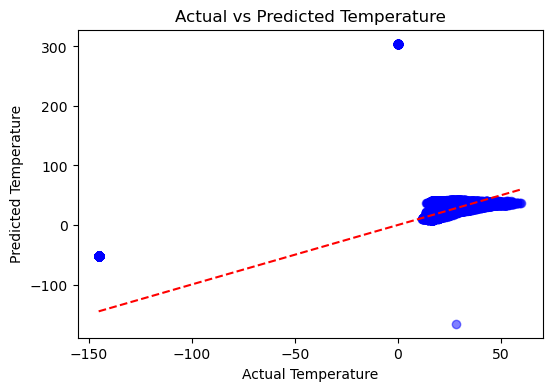

In [65]:
# plot of comparison for Linear Regression model

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

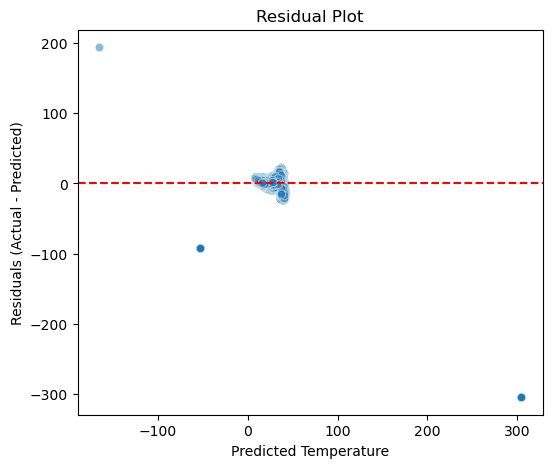

In [61]:
# Calculate residuals for LInear Regression model
residuals = y_test - y_pred

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [63]:
# Using Decision Tree:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)


In [69]:
# Evaluate model performance for Decision Tree:
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Decision Tree Regressor Performance:
Mean Squared Error: 5.4054
R2 Score: 0.9721


In [71]:
# Display predicted vs actual temperatures for first 10 samples

comparison_df = pd.DataFrame({
    'Actual Temperature': y_test.values[:10],
    'Predicted Temperature': y_pred_dt[:10]
})

print("\nComparison of Actual vs Predicted Temperatures (first 10 samples):")
print(comparison_df)


Comparison of Actual vs Predicted Temperatures (first 10 samples):
   Actual Temperature  Predicted Temperature
0               16.58                  16.64
1               31.45                  31.53
2               20.69                  20.45
3               23.22                  22.40
4               32.99                  33.09
5               25.96                  20.63
6               30.60                  27.16
7               25.07                  25.03
8               20.25                  31.72
9               19.58                  26.55


In [73]:
# Function to take user input and predict temperature using Decision Tree model
def predict_temperature_dt():
    print("Enter the following details to predict temperature:")
    pressure = float(input("Pressure: "))
    humidity = float(input("Humidity: "))
    lat = float(input("Latitude: "))
    lon = float(input("Longitude: "))
    
    # Create a DataFrame with proper column names
    input_features = pd.DataFrame([[pressure, humidity, lat, lon]], columns=['pressure', 'humidity', 'lat', 'lon'])
    
    # Predict temperature using decision tree model
    predicted_temp = dt_model.predict(input_features)
    
    print(f"\nPredicted Temperature (Decision Tree): {predicted_temp[0]:.2f} °C")

# Call the function
predict_temperature_dt()

Enter the following details to predict temperature:


Pressure:  94327.88
Humidity:  46.37
Latitude:  42.669
Longitude:  23.318



Predicted Temperature (Decision Tree): 26.31 °C


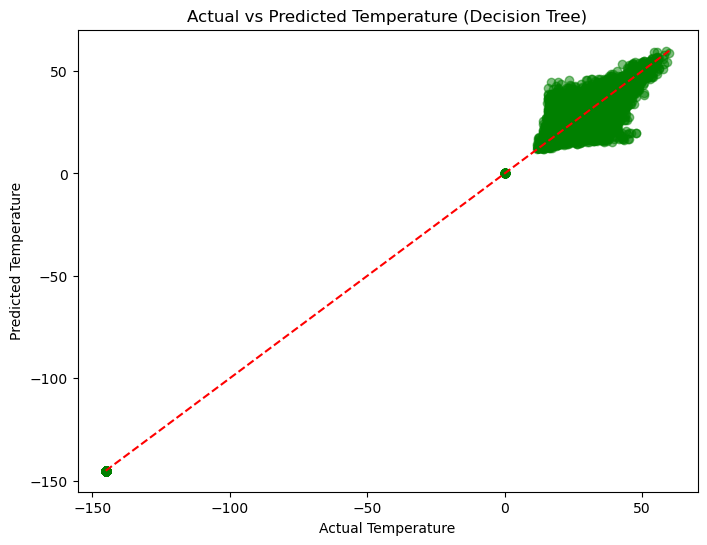

In [77]:
# Actual vs Predicted Scatter Plot based on decision tree method
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (Decision Tree)')
plt.show()

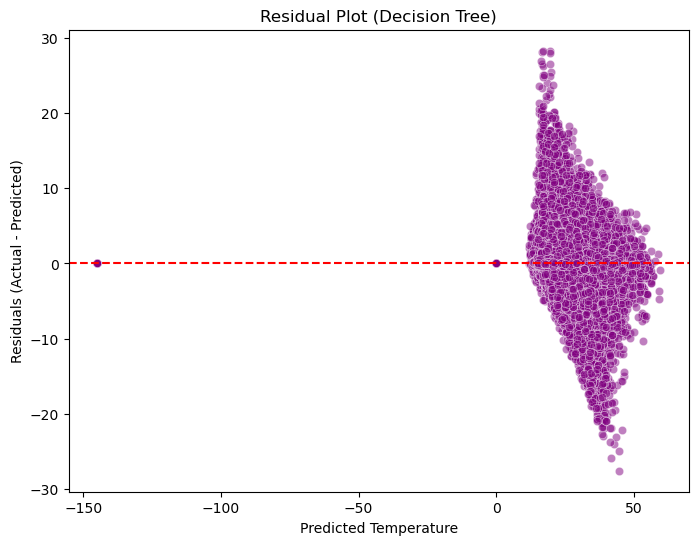

In [79]:
# Residual Plot based on decision tree method
residuals_dt = y_test - y_pred_dt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_dt, y=residuals_dt, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Decision Tree)')
plt.show()

# Residuals Distribution Plot comparison between models:

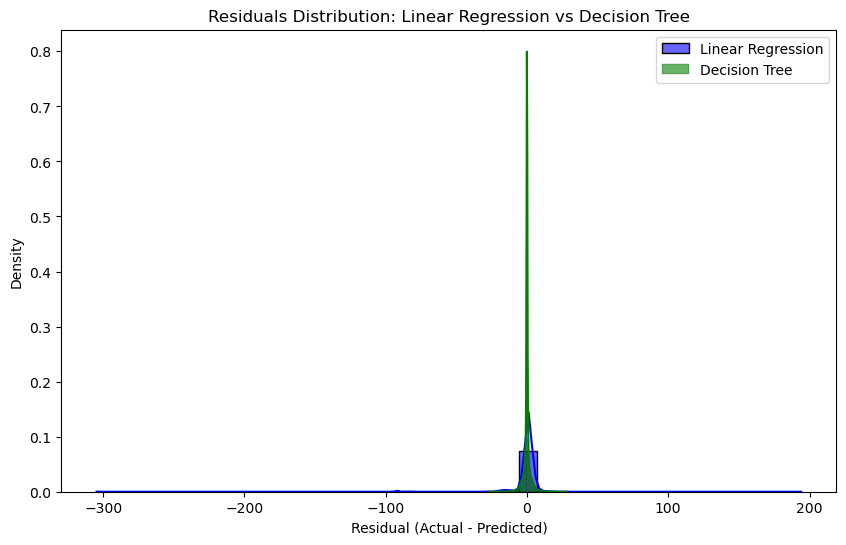

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, color='blue', label='Linear Regression', kde=True, stat='density', bins=40, alpha=0.6)
sns.histplot(y_test - y_pred_dt, color='green', label='Decision Tree', kde=True, stat='density', bins=40, alpha=0.6)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Density')
plt.title('Residuals Distribution: Linear Regression vs Decision Tree')
plt.legend()
plt.show()

In [98]:
# Model Performance Comparison Table

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
}

performance = []

for name, model in models.items():
    if name == 'Linear Regression':
        y_pred_model = y_pred  # Already predicted
    elif name == 'Decision Tree':
        y_pred_model = y_pred_dt
    
    mse = mean_squared_error(y_test, y_pred_model)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_model)
    r2 = r2_score(y_test, y_pred_model)
    
    performance.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

performance_df = pd.DataFrame(performance)
print(performance_df)

               Model        MSE      RMSE       MAE  R2 Score
0  Linear Regression  96.239095  9.810153  3.367868  0.503755
1      Decision Tree   5.405372  2.324946  1.151595  0.972128


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
